In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
# Load the data
file_path = '/content/SuperStore_Sales_DataSet.csv'
df = pd.read_csv(file_path)
print(df.head())

         Order ID Order Date Ship Date       Ship Mode Customer ID  \
0  CA-2019-160304   1/1/2019  1/7/2019  Standard Class    BM-11575   
1  CA-2019-160304   1/2/2019  1/7/2019  Standard Class    BM-11575   
2  CA-2019-160304   1/2/2019  1/7/2019  Standard Class    BM-11575   
3  CA-2019-125206   1/3/2019  1/5/2019     First Class    LR-16915   
4  US-2019-116365   1/3/2019  1/8/2019  Standard Class    CA-12310   

       Customer Name    Segment        Country          City       State  \
0      Brendan Murry  Corporate  United States  Gaithersburg    Maryland   
1      Brendan Murry  Corporate  United States  Gaithersburg    Maryland   
2      Brendan Murry  Corporate  United States  Gaithersburg    Maryland   
3       Lena Radford   Consumer  United States   Los Angeles  California   
4  Christine Abelman  Corporate  United States   San Antonio       Texas   

    Region       Product ID         Category Sub-Category  \
0     East  FUR-BO-10004709        Furniture    Bookcases   


In [4]:
print(df['Quantity'])

0       1
1       3
2       2
3       2
4       2
       ..
5896    4
5897    2
5898    3
5899    3
5900    3
Name: Quantity, Length: 5901, dtype: int64


In [5]:
# Data Preprocessing
data = df.dropna()  # Drop missing values

In [6]:
# Encode categorical features
encoder = LabelEncoder()
data['Category'] = encoder.fit_transform(data['Category'])

In [7]:
# Feature selection and scaling
features = ['Sales', 'Quantity', 'Profit']  # Adjust features as necessary
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

In [8]:
# Prepare sequences for LSTM
sequence_length = 5
X = []
y = []

for i in range(len(data) - sequence_length):
    X.append(data[features].iloc[i:i + sequence_length].values)
    y.append(data['Category'].iloc[i + sequence_length])

X = np.array(X)
y = np.array(y)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5953 - loss: 0.9831 - val_accuracy: 0.6102 - val_loss: 0.9368
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6061 - loss: 0.9463 - val_accuracy: 0.6102 - val_loss: 0.9373
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6053 - loss: 0.9444 - val_accuracy: 0.6102 - val_loss: 0.9366
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6037 - loss: 0.9461 - val_accuracy: 0.6102 - val_loss: 0.9353
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6189 - loss: 0.9299 - val_accuracy: 0.6102 - val_loss: 0.9362
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5982 - loss: 0.9562 - val_accuracy: 0.6102 - val_loss: 0.9369
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5986 - loss: 0.9528 - val_accuracy: 0.6102 - val_loss: 0.9352
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6024 - loss: 0.9499 - val_accuracy: 

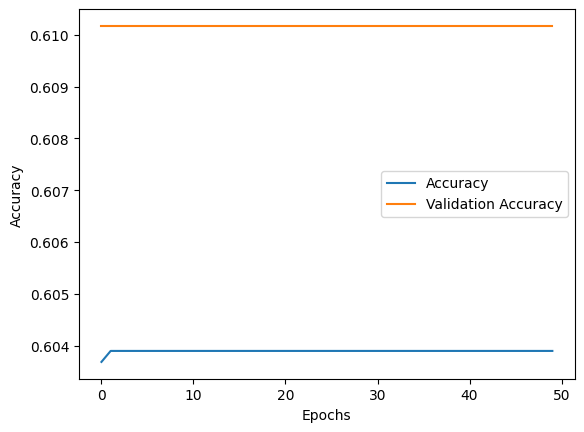

In [13]:
# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6042 - loss: 0.9410
Test Accuracy: 0.61


In [15]:
# Knowledge-Based Filtering Implementation
def knowledge_based_filter(product, sales_threshold=0.5, profit_threshold=0.5):
    """
    A simple knowledge-based filter that recommends products based on business rules.
    :param product: Product name or ID.
    :param sales_threshold: Minimum sales score for recommendation.
    :param profit_threshold: Minimum profit score for recommendation.
    :return: True if the product should be recommended, False otherwise.
    """
    # Fetch product details
    product_data = data[data['Product Name'] == product]
    if product_data.empty:
        return False

    # Apply knowledge-based rules
    if product_data['Sales'].values[0] > sales_threshold and product_data['Profit'].values[0] > profit_threshold:
        return True
    return False

In [16]:
# Example of generating recommendations
def recommend_products():
    recommendations = []
    for product in data['Product Name'].unique():
        if knowledge_based_filter(product):
            recommendations.append(product)
    return recommendations

In [17]:
# Get and display recommendations
recommended_products = recommend_products()
print("Recommended Products based on Knowledge-Based Filtering:")
print(recommended_products)

Recommended Products based on Knowledge-Based Filtering:
['HP Designjet T520 Inkjet Large Format Printer - 24" Color', 'Ativa V4110MDD Micro-Cut Shredder', '3D Systems Cube Printer, 2nd Generation, Magenta']


In [18]:
import seaborn as sns
# Data Preprocessing
data = data.dropna()  # Drop missing values

# Feature selection
features = ['Sales', 'Quantity', 'Profit']

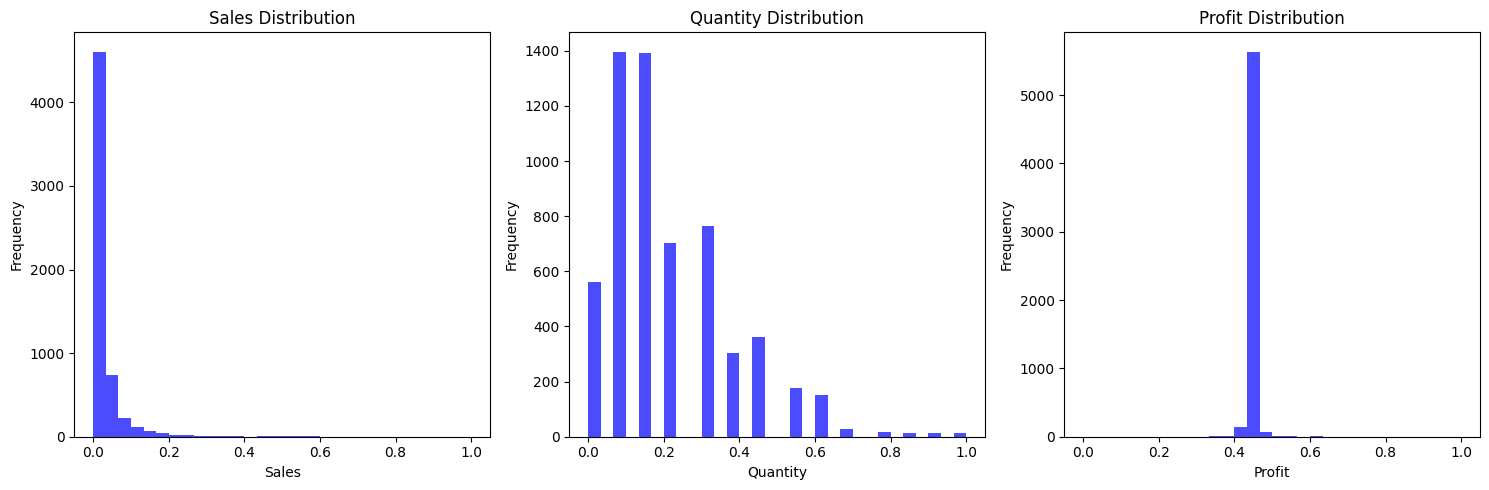

In [19]:
# 1. Plot Histograms for Sales, Quantity, and Profit
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    plt.hist(data[feature], bins=30, color='blue', alpha=0.7)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


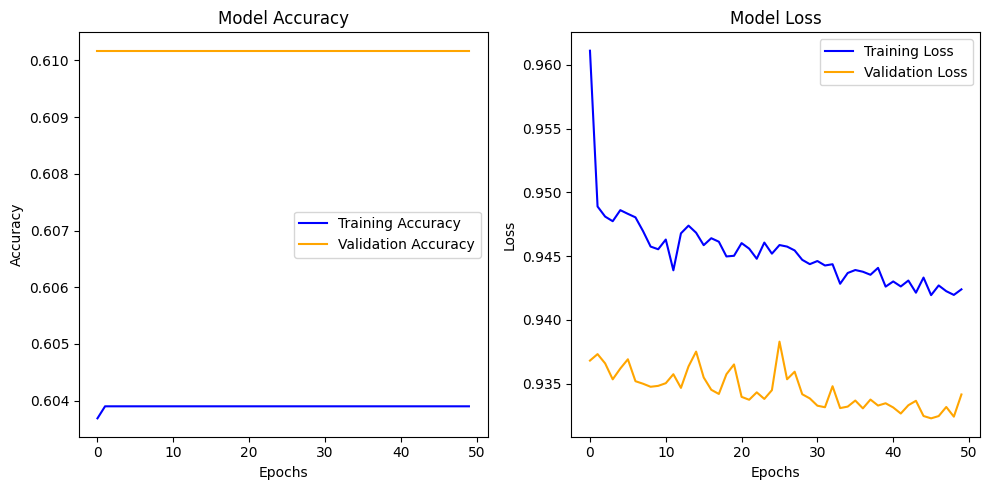

In [20]:
# 2. Plot Model Training Performance
# Assuming `history` is the training history object from the LSTM model
plt.figure(figsize=(10, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

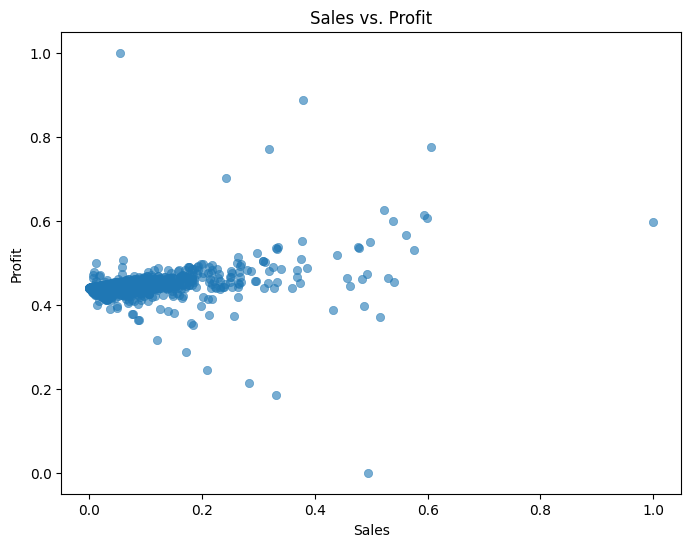

In [21]:
# 3. Sales vs. Profit Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=data, alpha=0.6, edgecolor=None)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


In [22]:
pip install scikit-learn


Recommender System Evaluation Metrics:
Precision: 0.3333
Recall: 0.3333
F1-Score: 0.3333
Accuracy: 0.2000
Coverage: 0.6000


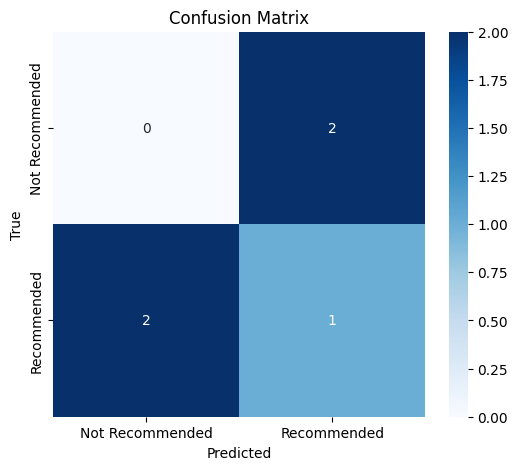

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns

# Function to generate confusion matrix for recommender system
def evaluate_and_plot_confusion_matrix(true_recommendations, predicted_recommendations):
    """
    Evaluate the recommender system and print the confusion matrix.

    :param true_recommendations: List of true products that should be recommended (ground truth)
    :param predicted_recommendations: List of products recommended by the system
    :return: None (prints out the confusion matrix and evaluation metrics)
    """
    # Get all unique products
    all_products = set(true_recommendations + predicted_recommendations)

    # Convert the lists to binary format (1 if product is recommended, 0 otherwise)
    true_binary = [1 if product in true_recommendations else 0 for product in all_products]
    predicted_binary = [1 if product in predicted_recommendations else 0 for product in all_products]

    # Generate confusion matrix
    cm = confusion_matrix(true_binary, predicted_binary)

    # Calculate evaluation metrics
    precision = precision_score(true_binary, predicted_binary)
    recall = recall_score(true_binary, predicted_binary)
    f1 = f1_score(true_binary, predicted_binary)
    accuracy = accuracy_score(true_binary, predicted_binary)

    # Print evaluation metrics
    print("Recommender System Evaluation Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    # Coverage (Proportion of products recommended out of all possible products)
    coverage = len(predicted_recommendations) / len(all_products)
    print(f"Coverage: {coverage:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Example Usage
# Assume these are your true and predicted recommendations
true_recommendations = ["Product A", "Product B", "Product C"]  # Example ground truth
predicted_recommendations = ["Product A", "Product D", "Product E"]  # Example predictions

# Evaluate the recommender system and plot the confusion matrix
evaluate_and_plot_confusion_matrix(true_recommendations, predicted_recommendations)
